In [1]:
plt.style.use('bmh')
color = '#1240AB'

### General statistics

In [2]:
df = pd.read_pickle('data/df.pkl')
df_tags = pd.read_pickle('data/df_tags.pkl')
df_price = pd.read_pickle('data/df_price.pkl')

del df['video_count']

In [3]:
df['date_month'] = pd.to_datetime(df.date.astype(str).str[:7])
df[:3]

,id,conversation_id,date,time,username,tweet,language,replies_count,retweets_count,likes_count,tweets_count,date_month
0,1583608299085500416,1583289720846618627,2022-10-22,02:56:55,mxyzptlk07,"@JakeGagain Get an $OCEAN bag, no matter how s...",en,0,0,4,1,2022-10-01
1,1583607565543669761,1583607565543669761,2022-10-22,02:54:00,mxyzptlk07,Great! Let's go #datascientists💪 Do you have ...,en,0,0,0,1,2022-10-01
2,1583603064044367872,1583603064044367872,2022-10-22,02:36:07,moonhodler2,"""The Energy Efficiency Data challenge is desig...",en,0,0,0,1,2022-10-01


In [4]:
df_stat = df.groupby('date_month').sum().iloc[:,2:]
df_stat['users_count'] = df.groupby('date_month')['username'].nunique()

df_stat['replies_per_tweet']  = df_stat['replies_count'] / df_stat['tweets_count']
df_stat['retweets_per_tweet'] = df_stat['retweets_count'] / df_stat['tweets_count']
df_stat['likes_per_tweet']    = df_stat['likes_count'] / df_stat['tweets_count']

df_stat['tweets_per_user'] = df_stat['tweets_count'] / df_stat['users_count']

df_stat[:3]

,replies_count,retweets_count,likes_count,tweets_count,users_count,replies_per_tweet,retweets_per_tweet,likes_per_tweet,tweets_per_user
date_month,,,,,,,,,
2020-01-01,876,1339,7317,953,286,0.92,1.41,7.68,3.33
2020-02-01,1316,1850,11272,1429,373,0.92,1.29,7.89,3.83
2020-03-01,880,1444,7546,883,267,1.00,1.64,8.55,3.31


In [5]:
df_stat.columns

Index(['replies_count', 'retweets_count', 'likes_count', 'tweets_count',
       'users_count', 'replies_per_tweet', 'retweets_per_tweet',
       'likes_per_tweet', 'tweets_per_user'],
      dtype='object')

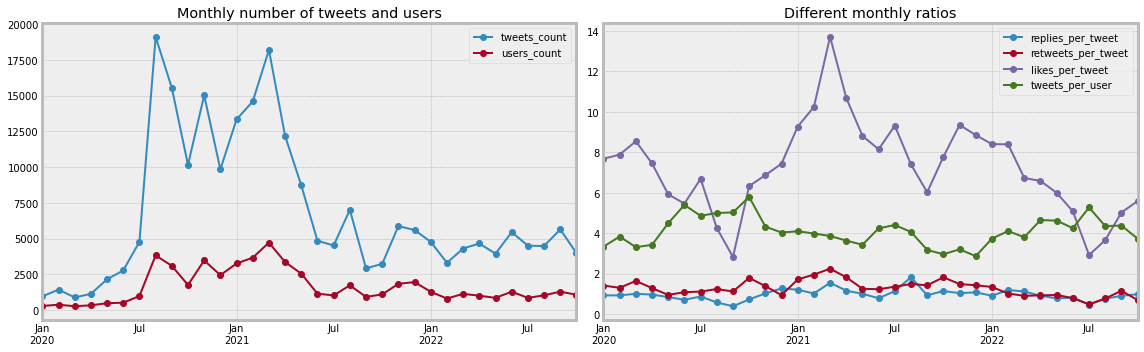

In [6]:
_, ax = plt.subplots(1,2, figsize = (16,5))
feats1 = ['tweets_count','users_count']
_ = df_stat[feats1].plot(ax = ax[0], style = 'o-', title = 'Monthly number of tweets and users', xlabel = '')

feats1 = ['replies_per_tweet', 'retweets_per_tweet','likes_per_tweet', 'tweets_per_user']
_ = df_stat[feats1].plot(ax = ax[1], style = 'o-', title = 'Different monthly ratios', xlabel = '')
plt.tight_layout()

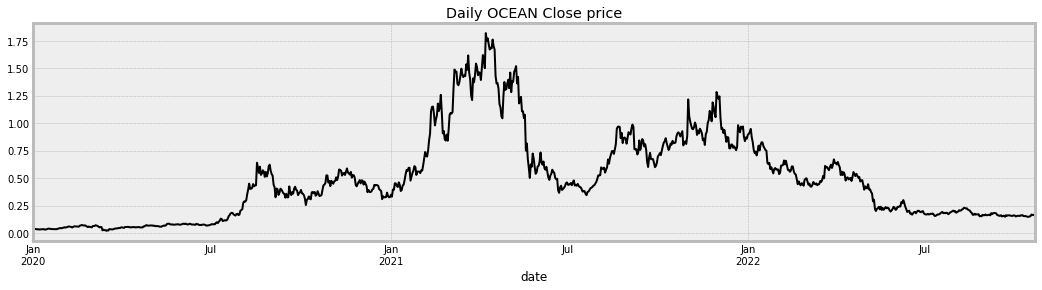

In [7]:
_ = df_price.Close.plot(figsize = (16,4), title = 'Daily OCEAN Close price', color = 'black')

In [8]:
df_stat.mean()

replies_count         6,606.50
retweets_count        9,410.12
likes_count          50,863.94
tweets_count          6,759.53
users_count           1,637.09
replies_per_tweet         0.96
retweets_per_tweet        1.27
likes_per_tweet           7.21
tweets_per_user           4.10
dtype: float64

### Correlations

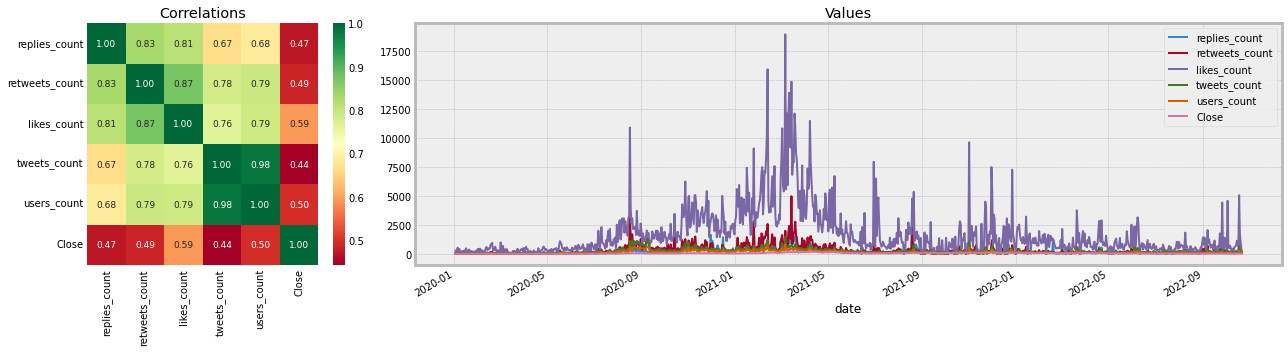

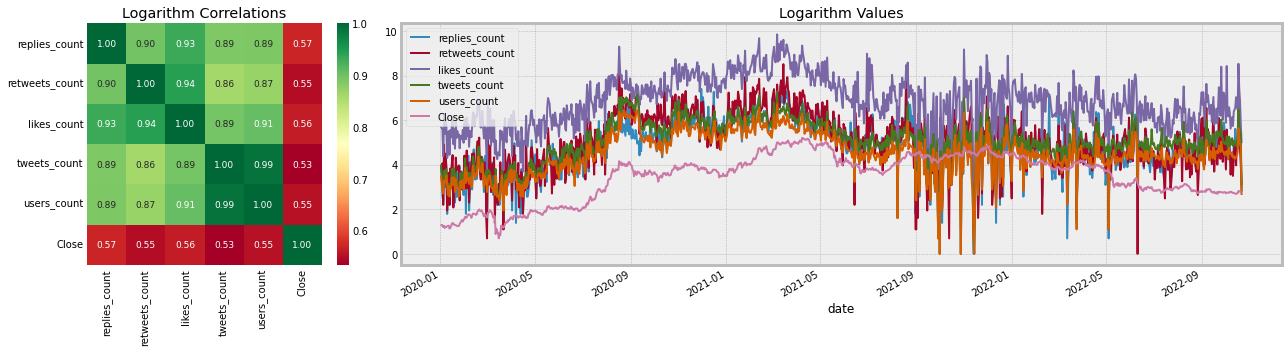

In [9]:
df0 = df.groupby('date').sum().iloc[1:,2:]
df0['users_count'] = df.groupby('date')['username'].nunique()
df0['Close'] = df_price.Close * 100

_, ax = plt.subplots(1,2, figsize = (18,5), width_ratios=[1, 3])
_ = sns.heatmap(df0.corr(), ax = ax[0], cmap = 'RdYlGn', annot = True, fmt = '.2f', annot_kws={"size": 9})
_ = ax[0].set_title('Correlations')
_ = df0.plot(ax = ax[1], title = 'Values')
plt.tight_layout()

_, ax = plt.subplots(1,2, figsize = (18,5), width_ratios=[1, 3])
_ = sns.heatmap(df0.apply(np.log).corr(), ax = ax[0], cmap = 'RdYlGn', annot = True, fmt = '.2f', annot_kws={"size": 9})
_ = ax[0].set_title('Logarithm Correlations')
_ = df0.apply(np.log).plot(ax = ax[1], title = 'Logarithm Values')
plt.tight_layout()

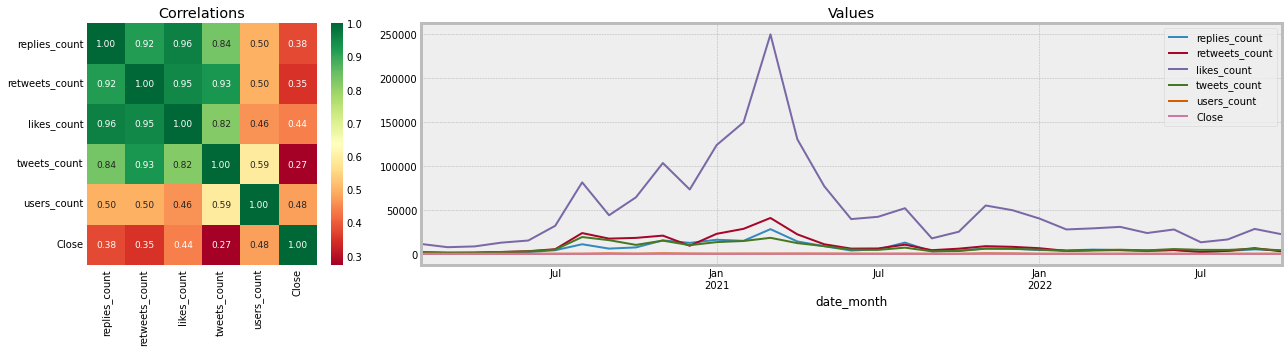

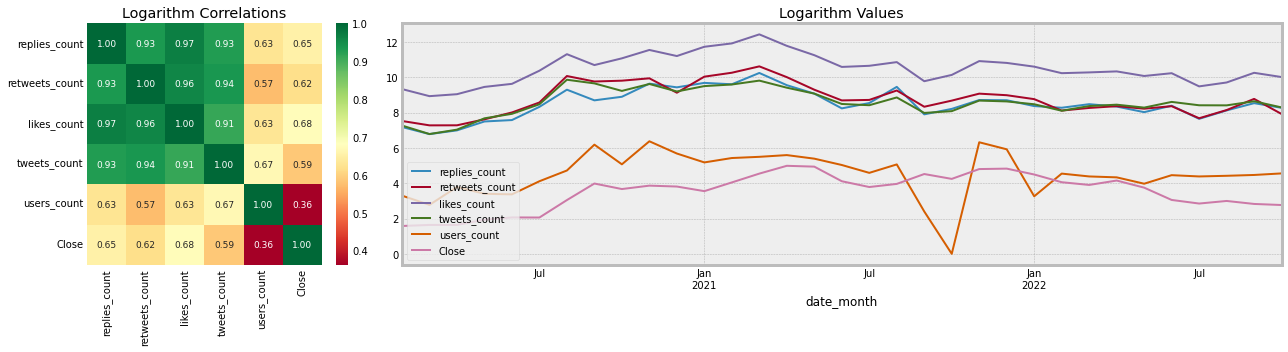

In [10]:
df0 = df.groupby('date_month').sum().iloc[1:,2:]
df0['users_count'] = df.groupby('date')['username'].nunique()
df0['Close'] = df_price.Close * 100

_, ax = plt.subplots(1,2, figsize = (18,5), width_ratios=[1, 3])
_ = sns.heatmap(df0.corr(), ax = ax[0], cmap = 'RdYlGn', annot = True, fmt = '.2f', annot_kws={"size": 9})
_ = ax[0].set_title('Correlations')
_ = df0.plot(ax = ax[1], title = 'Values')
plt.tight_layout()

_, ax = plt.subplots(1,2, figsize = (18,5), width_ratios=[1, 3])
_ = sns.heatmap(df0.apply(np.log).corr(), ax = ax[0], cmap = 'RdYlGn', annot = True, fmt = '.2f', annot_kws={"size": 9})
_ = ax[0].set_title('Logarithm Correlations')
_ = df0.apply(np.log).plot(ax = ax[1], title = 'Logarithm Values')
plt.tight_layout()

### Usernames

In [11]:
df1 = df.groupby('username').agg({
    # 'date': [min,max],
    'tweets_count': sum,
    'likes_count': sum,
    'replies_count': sum,
    'retweets_count': sum,
    'language': lambda x: list(set(x)),
}).reset_index().sort_values('tweets_count', ascending = False)
print(df1.shape)
df1[:5]

(28045, 6)


,username,tweets_count,likes_count,replies_count,retweets_count,language
9887,dyorcryptobot,4005,9308,1172,1832,"[no, in, da, en, fi, sv, vi, ca, qme, und]"
6177,crypto3ot,2460,249,21,647,"[en, ro]"
17598,mcryptomines,2382,8350,654,988,"[sl, en, in, es, lt, qme, pt, und, qct, ro, no..."
21430,rainichimoku,2021,9566,1965,2014,"[ro, es, en, it, und, pt]"
18687,mrrhincodon,1396,5404,1292,1454,"[ro, es, tl, en, fi, qme]"


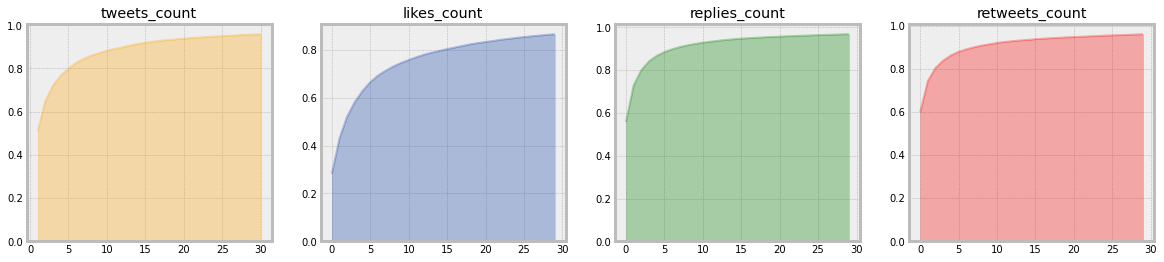

In [12]:
# numeric features distributions
_, ax = plt.subplots(1,4, figsize = (18,4))

colors = ['orange',color,'green','red']
feats = list(df1.columns)[1:-1]
for i,f in enumerate(feats):
    x = df1[f].value_counts(normalize = True).sort_index().cumsum()
    _ = x[:30].plot(ax = ax[i], kind = 'area', alpha = 0.3, color = colors[i], title = f)

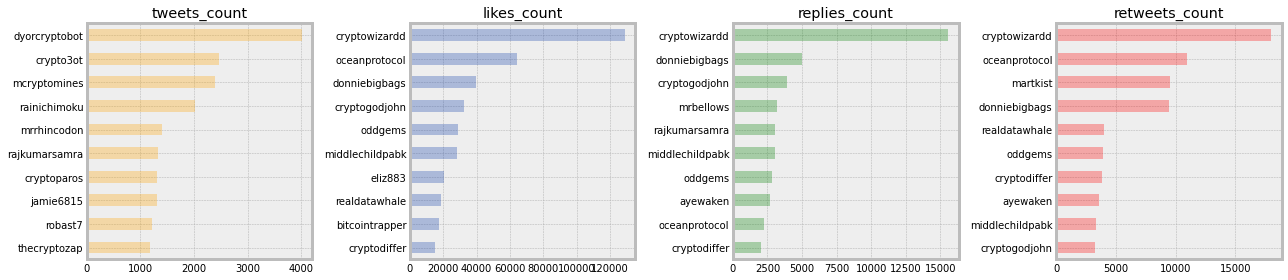

In [13]:
# numeric features distributions
_, ax = plt.subplots(1,4, figsize = (18,4))

colors = ['orange',color,'green','red']
feats = list(df1.columns)[1:-1]
for i,f in enumerate(feats):
    x = df1.sort_values(f, ascending = False).set_index('username')[f]
    _ = x[:10].sort_values().plot(ax = ax[i], kind = 'barh', alpha = 0.3, color = colors[i], title = f, ylabel = '')
plt.tight_layout()

### Find bots in usernames

In [14]:
a = df.username.value_counts()[0:][:10]
a

dyorcryptobot    4005
crypto3ot        2460
mcryptomines     2382
rainichimoku     2021
mrrhincodon      1396
rajkumarsamra    1326
cryptoparos      1311
jamie6815        1306
robast7          1210
thecryptozap     1170
Name: username, dtype: int64

In [15]:
b = a.index[0]
print(b)
df[df.username == b].tweet.str[:80][:10]

dyorcryptobot


199    [Scan results - #KuCoin - 15m]  Top 5 bullish ...
203    [Scan results - #KuCoin - 15m]  Top 5 bullish ...
204    [Scan results - #Binance - 15m]  Top 5 bullish...
206    [Scan results - #KuCoin - 15m]  Top 5 bullish ...
207    [Scan results - #Binance - 15m]  Top 5 bullish...
215    [Scan results - #Gateio - 15m]  Top 5 bullish ...
216    [Scan results - #KuCoin - 15m]  Top 5 bullish ...
217    [Scan results - #Binance - 15m]  Top 5 bullish...
220    [Scan results - #KuCoin - 15m]  Top 5 bullish ...
221    [Scan results - #Binance - 15m]  Top 5 bullish...
Name: tweet, dtype: object

In [16]:
list_bots = '''dyorcryptobot
crypto3ot
abnormal_crypto
futuresheroes
ta4cryptobot
thepumpadvisor
acoindetective
denario_bot
signalsexp
cryptostatsbot
volumemonitor
cryptotrendin
true_botter
botusdt
botbtc1
nata79551571
runbibot
m4nth3d4n'''.split('\n')

df1[df1.username.isin(list_bots)]

,username,tweets_count,likes_count,replies_count,retweets_count,language
9887,dyorcryptobot,4005,9308,1172,1832,"[no, in, da, en, fi, sv, vi, ca, qme, und]"
6177,crypto3ot,2460,249,21,647,"[en, ro]"
940,abnormal_crypto,1084,205,361,46,"[it, es]"
11397,futuresheroes,1080,181,92,33,"[en, fr]"
24619,ta4cryptobot,986,115,157,19,"[en, ro, in]"
25317,thepumpadvisor,978,536,54,152,[en]
1005,acoindetective,943,657,72,666,"[ro, in, nl, en, de]"
9067,denario_bot,738,175,36,580,"[en, ro]"
23522,signalsexp,718,64,48,11,[en]
8025,cryptostatsbot,649,404,38,348,"[es, ro, nl, ht, in, tl, en, sl, it, fr, de, d..."


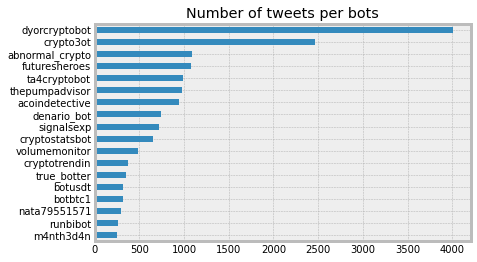

In [17]:
_ = df1[df1.username.isin(list_bots)].set_index('username').tweets_count.sort_values().plot(kind = 'barh', ylabel = '', figsize = (6,4), title = 'Number of tweets per bots')

### Influential usernames tweets
1. Select usernames with at least 100 number of tweets.
2. Calculate their average values of the number of likes, retweets and replies per tweet.
3. Create the percentage ranking values by these statistics.
4. Let's take a sum of rankings as the Total Rank and sort usernames by descending of this rank.
5. Select TOP-N usernames and considering that group as Influential.
6. Calculate daily statistics of that group and compare them with OCEAN Close price by calculating the Pearson correlations.

In [18]:
df_gr = df.groupby('username').sum().iloc[:,2:]
df_gr = df_gr[df_gr.tweets_count >= 100]
print(df_gr.shape)

df_gr['replies_per_tweet']  = df_gr['replies_count'] / df_gr['tweets_count']
df_gr['retweets_per_tweet'] = df_gr['retweets_count'] / df_gr['tweets_count']
df_gr['likes_per_tweet']    = df_gr['likes_count'] / df_gr['tweets_count']

df_gr['rank_total'] = df_gr.rank(pct = True).iloc[:,-3:].sum(axis = 1)
df_gr = df_gr.sort_values('rank_total', ascending = False).reset_index()

print(df_gr.shape)
df_gr[:10]

(322, 4)
(322, 9)


,username,replies_count,retweets_count,likes_count,tweets_count,replies_per_tweet,retweets_per_tweet,likes_per_tweet,rank_total
0,cryptowizardd,15549,17959,128715,668,23.28,26.88,192.69,2.99
1,cryptodiffer,2045,3870,15086,115,17.78,33.65,131.18,2.98
2,oceanprotocol,2273,10965,64253,272,8.36,40.31,236.22,2.97
3,cryptogodjohn,3911,3273,32282,230,17.00,14.23,140.36,2.95
4,donniebigbags,4992,9484,39490,424,11.77,22.37,93.14,2.95
5,bitcointrapper,1361,3035,17586,136,10.01,22.32,129.31,2.95
6,oddgems,2845,3910,29094,231,12.32,16.93,125.95,2.95
7,crypto_dep,1102,2169,9027,109,10.11,19.90,82.82,2.93
8,tehmoonwalker,1019,1690,9656,106,9.61,15.94,91.09,2.92
9,eliz883,1812,1646,20591,212,8.55,7.76,97.13,2.91


In [19]:
out = list()
for n in range(1,200):
    list_users = list(df_gr[:n].username)
    filt = df.username.isin(list_users)
    df0 = df[filt].groupby('date').sum().iloc[:,2:]
    
    df0['Close'] = df_price.Close * 100
    out1 = df0.corr().Close[:4].reset_index().T[1:]
    out.append(out1)

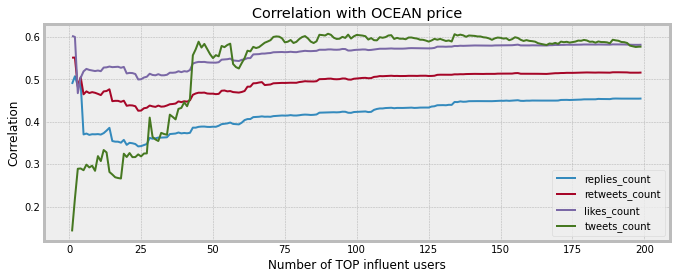

In [21]:
feats0 = list(df0.corr().Close[:4].index)
df_out = pd.concat(out)
df_out.columns = feats0
df_out.index = range(1,len(df_out)+1)
_ = df_out.plot(figsize = (10,4), xlabel = 'Number of TOP influent users', ylabel = 'Correlation', title = 'Correlation with OCEAN price')

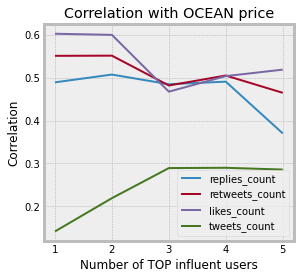

In [27]:
feats0 = list(df0.corr().Close[:4].index)
df_out = pd.concat(out)[:5]
df_out.columns = feats0
df_out.index = range(1,len(df_out)+1)
_ = df_out.plot(figsize = (4,4), xlabel = 'Number of TOP influent users', ylabel = 'Correlation', title = 'Correlation with OCEAN price')